# C5T2:  Exploratory Data Analysis of Credit One customer payments / defaults

Last update: 2018.10.15  
Updated by : Greg Hepguler

File: C5T2_Exploratory-Data-Analysis.ipynb

Project Notes:  
Credit One has seen an increase in the number of customers who have defaulted on loans.  
As the credit scoring service, they could lose business if the problem is not solved right away.  
Using customer payment and default record, Credit One seeks to understand whether or not 
a Customer is likely to default on their credit obligations.

Python Script Goal:  
Full exploration of the Credit One customer data

> 
> Import and Prepare the Data


In [1]:
# Import libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy  as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# This code fixes the pylab ERROR in the code below
import pylab
from matplotlib.pylab import *
from pylab import rc, rcParams

In [2]:
# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)    #### ERROR : NameError: name 'pylab' is not defined  ####

In [3]:
# Import Credit One payment and default data
CreditOneData = pd.read_csv('C5T2_default of credit card clients.csv', header =1)

In [4]:
# view a sample of the dataframe 
CreditOneData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit = CreditOneData.copy()

In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# understand the makeup of the data
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
# check the data types of each variable
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [10]:
credit['default payment next month'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default payment next month, dtype: float64

In [11]:
# Number of customers in education levels
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [12]:
# check for missing values
credit.isnull().sum()
# credit.isnull()           # Shows No missing 'NA' values at each row and column

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
# Drop duplicate rows
credit = credit.drop_duplicates()

In [14]:
# Confirm there were No duplicate rows 
# Still have same no of entries and columns
credit.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Columns: 25 entries, ID to default payment next month
dtypes: int64(25)
memory usage: 6.0 MB


In [15]:
credit['default payment next month'].astype('category') 

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]

In [16]:
# Discretize Age
bins = [20, 30, 40, 50, 60, 70, 80]
labels = [20,30,40,50,60, 70]
credit['AgeBin'] = pd.cut(credit['AGE'], bins=bins, labels=labels)
credit.head()
# check the data types of each variable
credit['AgeBin'].dtype

CategoricalDtype(categories=[20, 30, 40, 50, 60, 70], ordered=True)

In [17]:
# Get Column List and Move AgeBin data column next to Age
cols = list(credit.columns.values)
cols

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'AgeBin']

In [18]:
credit = credit [['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'AgeBin', 
                   'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                   'default payment next month']]

In [19]:
# Move AgeBin data column next to Age
cols = list(credit.columns.values)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,AgeBin,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,20,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,20,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,30,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,30,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,50,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
# Number of customers in education levels
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others)
credit.groupby('AgeBin')['AgeBin'].count()

AgeBin
20    11013
30    10713
40     6005
50     1997
60      257
70       15
Name: AgeBin, dtype: int64

  
> VISUALIZING THE DATA

>> Histograms

In [21]:
# the column names in our dataframe 
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'AgeBin',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


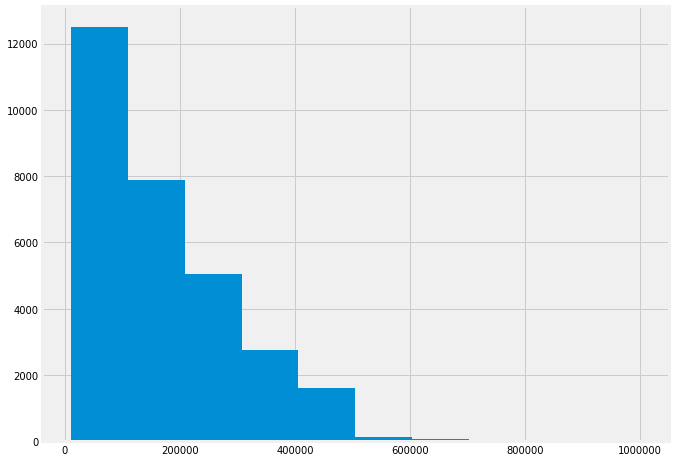

In [22]:
# histogram using the .hist method of matplotlib
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

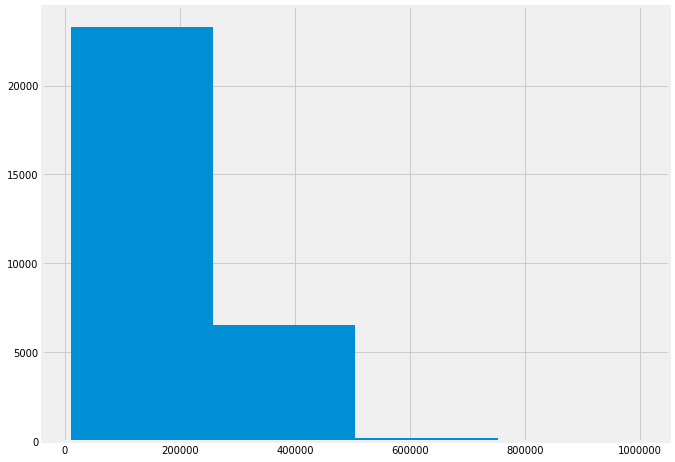

In [23]:
# specify the number of bins in histograms by adding bins='X' 
plt.hist(credit['LIMIT_BAL'], bins=4)

(array([11013., 10713.,  6005.,  1997.,   257.,    15.]),
 array([20.        , 28.33333333, 36.66666667, 45.        , 53.33333333,
        61.66666667, 70.        ]),
 <a list of 6 Patch objects>)

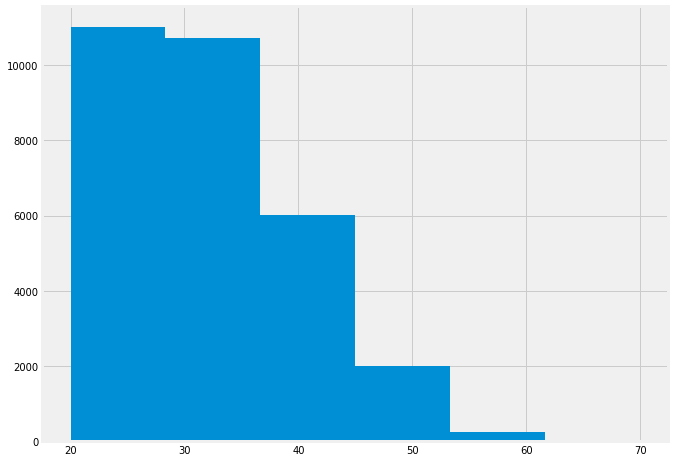

In [24]:
# specify the number of bins in histograms by adding bins='X' 
plt.hist(credit['AgeBin'], bins=6)

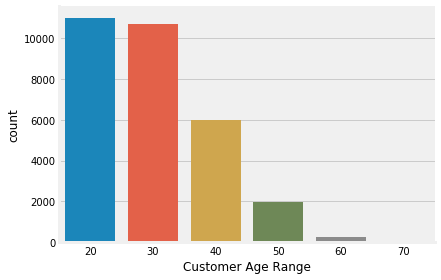

In [25]:
# Use seaborn to plot the number of Customers in each AgeBin
fg = sns.factorplot('AgeBin', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Customer Age Range')

In [26]:
credit.groupby('SEX')['SEX'].count()   # 1 = Male, 2 = Female

SEX
1    11888
2    18112
Name: SEX, dtype: int64

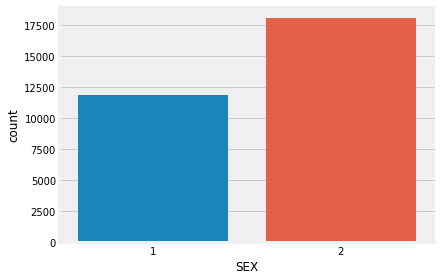

In [27]:
# use seaborn to plot the number of males and females
sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)   # 1 = Male, 2 = Female

In [28]:
bins = [0, 1, 2]
slabels = ['Male', 'Female']
credit['LSEX'] = str(credit['SEX'])

credit['LSEX'] = pd.cut(credit['SEX'], bins=bins, labels=slabels)
credit.head()
# check the data types of each variable
credit['LSEX'].dtype

CategoricalDtype(categories=['Male', 'Female'], ordered=True)

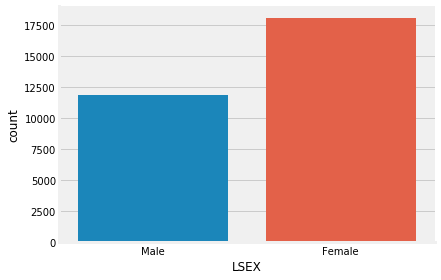

In [29]:
# use seaborn to plot the number of males and females
sns.factorplot('LSEX', data=credit, kind='count', aspect=1.5)   # 1 = Male, 2 = Female

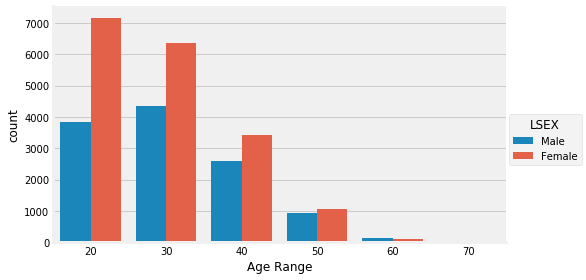

In [30]:
# Again use saeborn to group by Sex and Age range
g = sns.factorplot('AgeBin', data=credit, hue='LSEX', kind='count', aspect=1.75)
g.set_xlabels('Age Range')

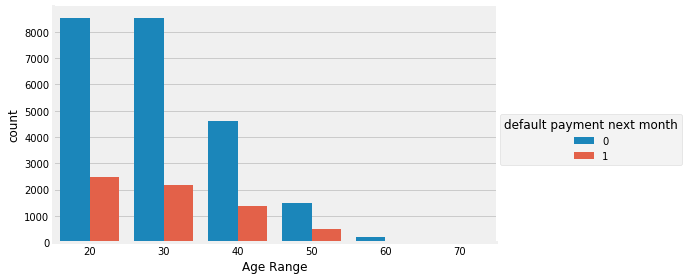

In [31]:
# Again use saeborn to group by Age Range and default payment
g = sns.factorplot('AgeBin', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('Age Range')

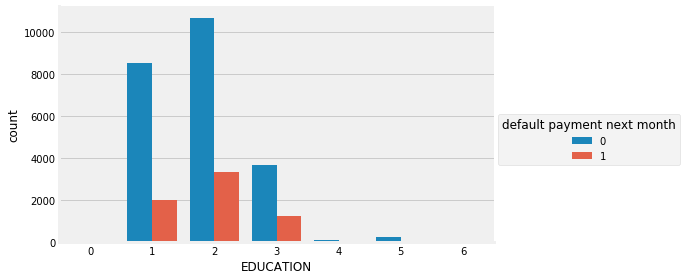

In [32]:
# Again use saeborn to group by Age Range and default payment
g = sns.factorplot('EDUCATION', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

>> Line Plots

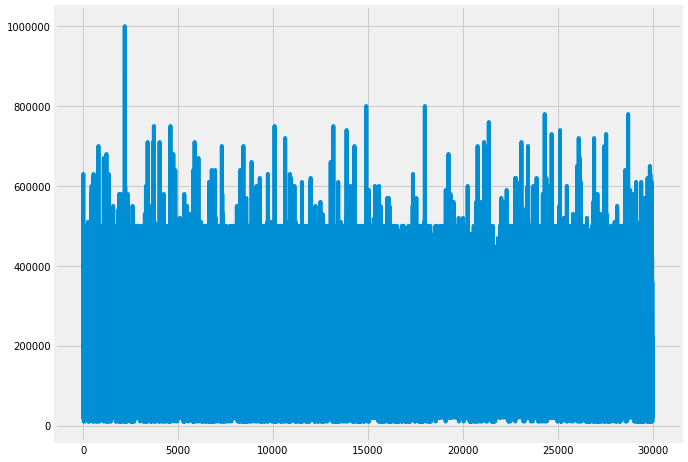

In [33]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

>> Scatter Plots

In [34]:
x = credit['PAY_0']
y = credit['PAY_2']

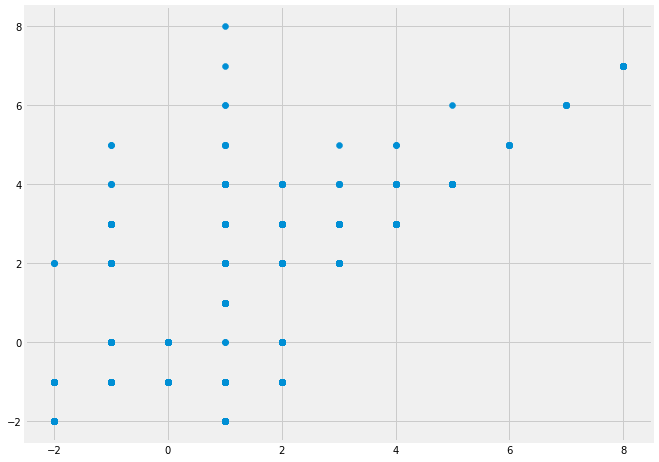

In [35]:
plt.scatter(x,y)
plt.show()

>> Box Plots

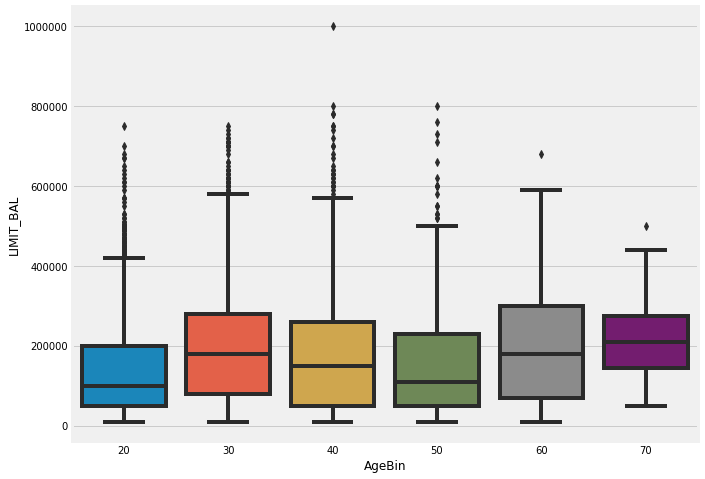

In [36]:
ax = sns.boxplot(x="AgeBin", y="LIMIT_BAL", data=credit)

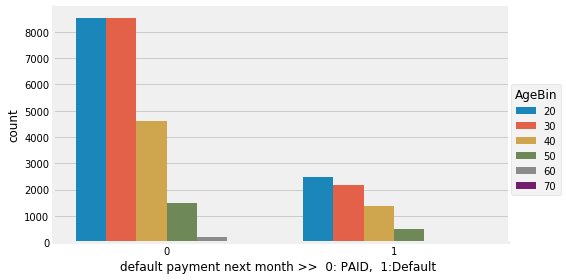

In [37]:
# Again use saeborn to group by Sex and class
g = sns.factorplot('default payment next month', data=credit, hue='AgeBin', kind='count', aspect=1.75)
g.set_xlabels('default payment next month >>  0: PAID,  1:Default ')

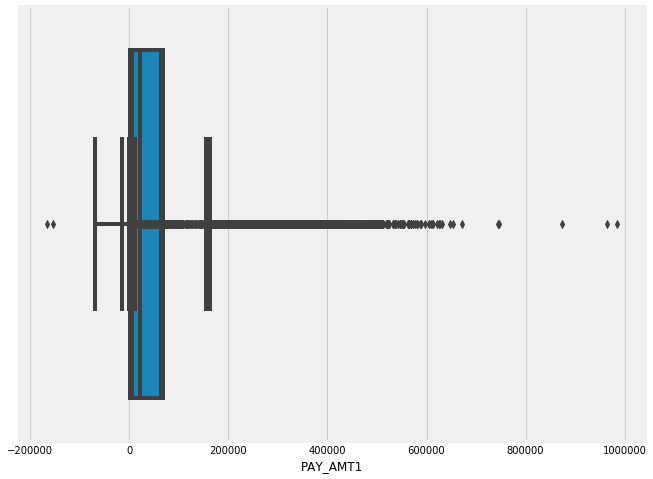

In [38]:
ax = sns.boxplot(x=credit["BILL_AMT1"])
ax = sns.boxplot(x=credit["BILL_AMT2"])
ax = sns.boxplot(x=credit["PAY_AMT1"])

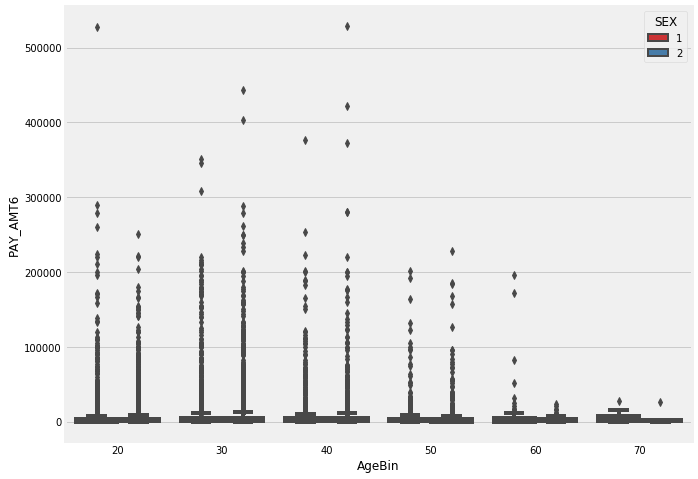

In [39]:
ax = sns.boxplot(x="AgeBin", y="PAY_AMT6", hue="SEX", data=credit, palette="Set1")

>> Distribution plot

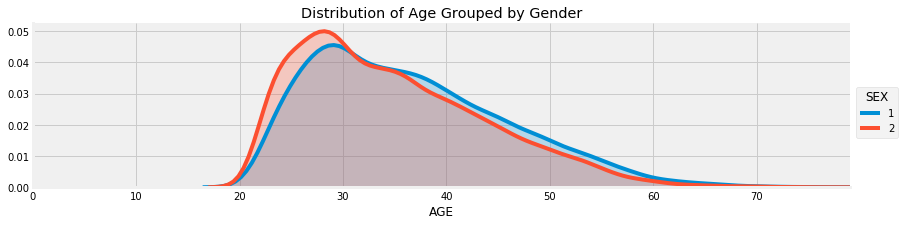

In [40]:
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

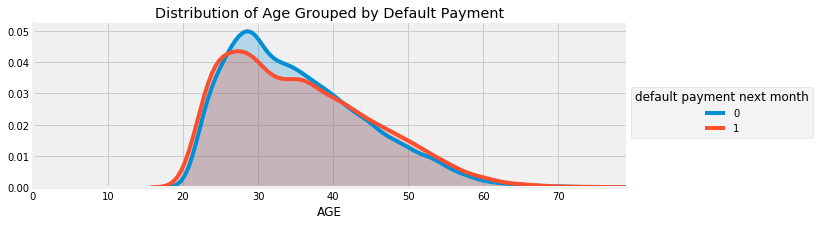

In [41]:
fig = sns.FacetGrid(credit, hue='default payment next month', aspect=3)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Default Payment')
fig.add_legend()


> CORRELATION MATRIX
>> CM is generated prior to changing data types

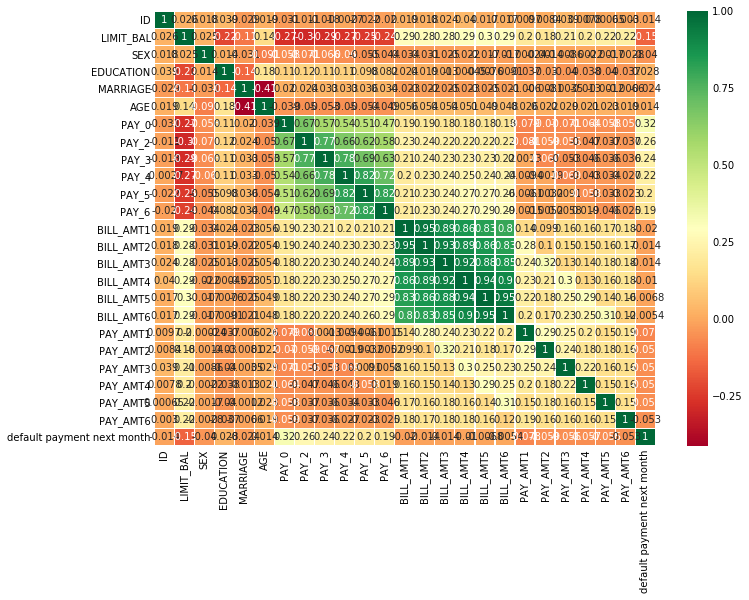

In [42]:
credit_corr = CreditOneData.copy()

# Correlation between features
sns.heatmap(credit_corr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [43]:
print("Correlation Matrix")
# print(credit_corr.corr())  
print()

def get_redundant_pairs(credit):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = credit_corr.columns
    for i in range(0, credit.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = credit_corr.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(credit_corr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(credit_corr, 15))

Correlation Matrix

Top Absolute Correlations
BILL_AMT1  BILL_AMT2    0.951484
BILL_AMT5  BILL_AMT6    0.946197
BILL_AMT4  BILL_AMT5    0.940134
BILL_AMT2  BILL_AMT3    0.928326
BILL_AMT3  BILL_AMT4    0.923969
BILL_AMT4  BILL_AMT6    0.900941
BILL_AMT2  BILL_AMT4    0.892482
BILL_AMT1  BILL_AMT3    0.892279
BILL_AMT3  BILL_AMT5    0.883910
BILL_AMT1  BILL_AMT4    0.860272
BILL_AMT2  BILL_AMT5    0.859778
BILL_AMT3  BILL_AMT6    0.853320
BILL_AMT2  BILL_AMT6    0.831594
BILL_AMT1  BILL_AMT5    0.829779
PAY_4      PAY_5        0.819835
dtype: float64


In [44]:
covMat = credit_corr.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

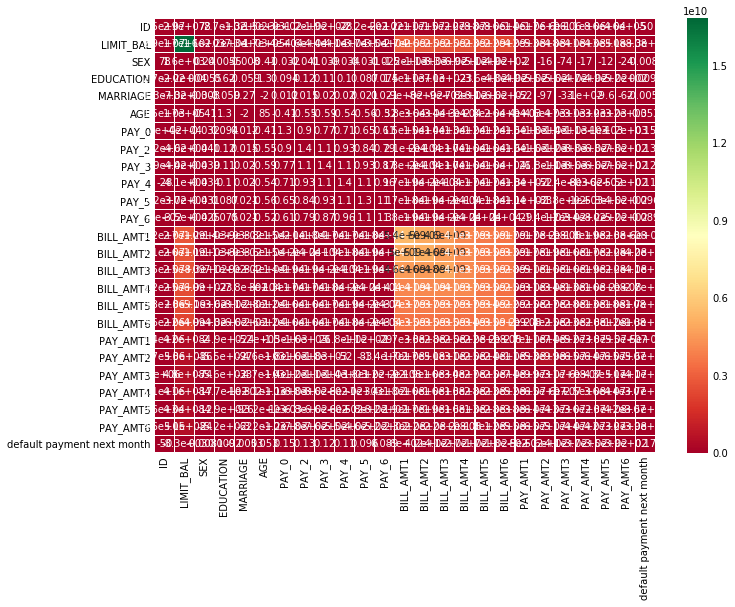

In [45]:
# Covariance
sns.heatmap(credit_corr.cov(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

> Drop Features based on Results from Correlation Matrix where Correlation Coeff > 0.9

In [46]:
# Replacing AgeBin with AGE, and dropping highly correlated data using Correlation Matrix results
# LSEX was used for Visualization
EDAresults = credit.drop(['AGE', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT5', 'LSEX'], axis=1)

In [47]:
# Write dataset after EDA
EDAresults.to_csv('C5T2_EDAresults_GregHepguler.csv', index=False, header=True)